# AI-Driven Product Recommendation System
## Amazon Products Dataset (2023)

### Project Objective
This project builds an end-to-end product recommendation and customer analysis system
inspired by real-world e-commerce platforms like Amazon.

The goals of this project are:
- To analyze product trends using exploratory data analysis (EDA)
- To simulate realistic customer purchase behavior
- To segment customers using RFM and Cohort Analysis
- To generate personalized product recommendations

### Dataset
Source: Amazon Products Dataset (Kaggle, 2023)

Note:
The dataset does not contain customer purchase history.
Therefore, realistic synthetic users and transactions are generated
for academic and analytical purposes.

In [5]:
# Basic Python libraries
import os
import glob
import random
from datetime import datetime, timedelta

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print("All libraries imported successfully")

All libraries imported successfully


## Step 1: Loading Amazon Product Dataset

The Amazon dataset consists of multiple CSV files, each representing
a different product category.

In this step:
- We load all CSV files from the data/raw folder
- Combine them into a single DataFrame
- Inspect the basic structure of the data

In [6]:
# Path to raw data folder
DATA_PATH = "../data/raw"

# Get list of all CSV files
csv_files = glob.glob(os.path.join(DATA_PATH, "*.csv"))

print(f"Total CSV files found: {len(csv_files)}")

# Show first 5 file names
csv_files[:5]

Total CSV files found: 140


['../data/raw/Suitcases and Trolley Bags.csv',
 '../data/raw/Amazon Fashion.csv',
 '../data/raw/Kitchen Storage and Containers.csv',
 '../data/raw/Coffee Tea and Beverages.csv',
 '../data/raw/Running.csv']

In [7]:
# Empty list to store individual dataframes
dataframes = []

# Loop through each CSV file and load it
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df["source_file"] = os.path.basename(file)  # track category source
        dataframes.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Combine all dataframes
amazon_df = pd.concat(dataframes, ignore_index=True)

print("Combined dataset shape:", amazon_df.shape)

Combined dataset shape: (1103170, 11)


In [8]:
# Preview first 5 rows
amazon_df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,source_file,Unnamed: 0
0,Skybags Treble-FIFA 68cm Printed Polycarbonate...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71C5GfgxW2...,https://www.amazon.in/Skybags-Treble-FIFA-Prin...,4.5,2,"₹7,250","₹14,500",Suitcases and Trolley Bags.csv,NaN
1,Tommy Hilfiger Plastic Hard 66 cms Luggage (89...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/41lIioNQ3N...,https://www.amazon.in/Tommy-Hilfiger-Luggage-8...,3.6,70,"₹6,399","₹7,999",Suitcases and Trolley Bags.csv,NaN
2,Samsonite Polyester Hard 68 Cms Luggage- Suitc...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71XSVc5fxg...,https://www.amazon.in/Samsonite-Polyester-Lugg...,4.0,5,"₹12,220","₹18,800",Suitcases and Trolley Bags.csv,NaN
3,Skybags Polycarbonate Hard 21 Cms Suitcase(_Blue),bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/51euSZMWAn...,https://www.amazon.in/Skybags-Combo-Polycarbon...,4.4,66,"₹6,648","₹10,043.04",Suitcases and Trolley Bags.csv,NaN
4,Skybags Game-ON FIFA 79cm Printed Polycarbonat...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/710caoNQ4X...,https://www.amazon.in/Skybags-Printed-Polycarb...,4.3,5,"₹6,850","₹17,400",Suitcases and Trolley Bags.csv,NaN


## Step 2: Understanding the Dataset

Before cleaning or analysis, it is important to understand:
- What columns exist
- What type of data each column contains
- Whether there are missing or inconsistent values

In [9]:
# Display column names
amazon_df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'source_file',
       'Unnamed: 0'],
      dtype='object')

In [10]:
# Dataset information
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         751582 non-null   object 
 6   no_of_ratings   751582 non-null   object 
 7   discount_price  980844 non-null   object 
 8   actual_price    1067544 non-null  object 
 9   source_file     1103170 non-null  object 
 10  Unnamed: 0      551585 non-null   float64
dtypes: float64(1), object(10)
memory usage: 92.6+ MB


In [11]:
# Check missing values in each column
amazon_df.isnull().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           351588
no_of_ratings     351588
discount_price    122326
actual_price       35626
source_file            0
Unnamed: 0        551585
dtype: int64

In [12]:
# Summary statistics for numeric columns
amazon_df.describe()

,Unnamed: 0
count,551585.000000
mean,7006.200471
std,5740.835523
min,0.000000
25%,1550.000000
50%,5933.000000
75%,11482.000000
max,19199.000000


## Step 3: Data Cleaning and Preparation

Real-world datasets often contain missing values, incorrect data types,
and unnecessary columns.

In this step, we:
- Remove irrelevant columns
- Convert price and rating columns to numeric format
- Handle missing values safely

In [13]:
# Drop unnecessary column
amazon_df.drop(columns=["Unnamed: 0"], inplace=True)

print("Column dropped successfully")

Column dropped successfully


In [14]:
# Function to clean price columns
def clean_price(column):
    return (
        column
        .str.replace("₹", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

# Apply cleaning
amazon_df["discount_price"] = clean_price(amazon_df["discount_price"])
amazon_df["actual_price"] = clean_price(amazon_df["actual_price"])

print("Price columns cleaned")

Price columns cleaned


In [15]:
# SAFELY extract numeric values from ratings
amazon_df["ratings"] = (
    amazon_df["ratings"]
    .astype(str)
    .str.extract(r"(\d+\.?\d*)")
    .astype(float)
)

# SAFELY extract numeric values from number of ratings
amazon_df["no_of_ratings"] = (
    amazon_df["no_of_ratings"]
    .astype(str)
    .str.extract(r"(\d+)")
    .astype(float)
)

print("Ratings and number of ratings cleaned safely")

Ratings and number of ratings cleaned safely


In [16]:
# Fill missing ratings with median
amazon_df["ratings"].fillna(amazon_df["ratings"].median(), inplace=True)

# Fill missing number of ratings with 0
amazon_df["no_of_ratings"].fillna(0, inplace=True)

# Fill missing discount price using actual price
amazon_df["discount_price"].fillna(amazon_df["actual_price"], inplace=True)

print("Missing values handled successfully")

Missing values handled successfully


In [17]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         1103170 non-null  float64
 6   no_of_ratings   1103170 non-null  float64
 7   discount_price  1067544 non-null  float64
 8   actual_price    1067544 non-null  float64
 9   source_file     1103170 non-null  object 
dtypes: float64(4), object(6)
memory usage: 84.2+ MB


The scraped dataset contained non-numeric text values such as product availability information within numeric fields. These were handled using regex-based numeric extraction followed by safe imputation.

## Step 4: Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand market trends and product behavior
before applying any machine learning techniques.

In this section, we analyze:
- Product category distribution
- Price patterns
- Ratings distribution
- Popular product categories

In [18]:
# Top 10 product categories by number of products
top_categories = amazon_df["main_category"].value_counts().head(10)

top_categories

main_category
accessories            232282
men's clothing         153312
women's clothing       153024
tv, audio & cameras    137318
men's shoes            114912
appliances              66192
stores                  65806
home & kitchen          29136
kids' fashion           26976
sports & fitness        25296
Name: count, dtype: int64

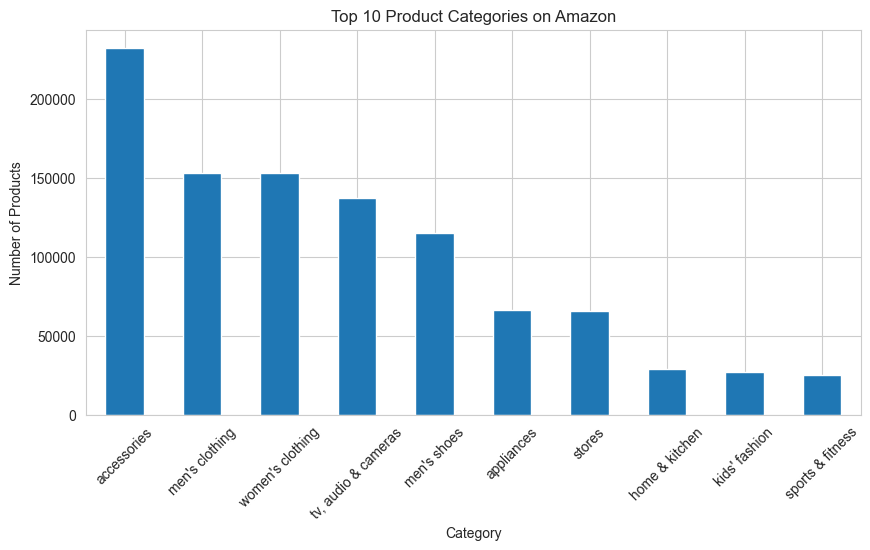

In [19]:
plt.figure(figsize=(10, 5))
top_categories.plot(kind="bar")
plt.title("Top 10 Product Categories on Amazon")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

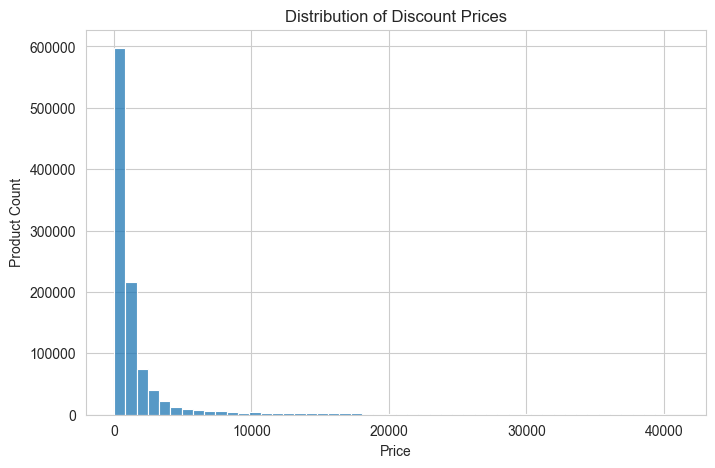

In [20]:
# Remove extreme outliers for visualization
price_data = amazon_df["discount_price"].dropna()
price_data = price_data[price_data < price_data.quantile(0.99)]

plt.figure(figsize=(8, 5))
sns.histplot(price_data, bins=50)
plt.title("Distribution of Discount Prices")
plt.xlabel("Price")
plt.ylabel("Product Count")
plt.show()

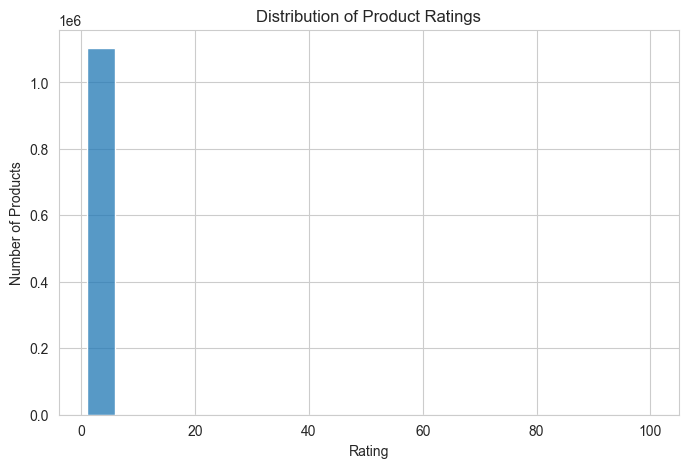

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(amazon_df["ratings"], bins=20)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show()

In [22]:
# Top 10 most reviewed products
popular_products = amazon_df.sort_values(
    by="no_of_ratings", ascending=False
).head(10)[["name", "main_category", "ratings", "no_of_ratings"]]

popular_products

,name,main_category,ratings,no_of_ratings
260007,Joyful Plastic Drawer Organizer Self Standard ...,home & kitchen,4.3,999.0
21715,GoSriKi Women's Cotton Blend Kurta with Palazz...,women's clothing,3.8,999.0
138767,"BY4U Laptop Tabletop Stand for Desk, Portable ...","tv, audio & cameras",4.0,999.0
381684,"BY4U Laptop Tabletop Stand for Desk, Portable ...","tv, audio & cameras",4.0,999.0
419609,VEGA Smooth Curl 19 mm Barrel Hair Curler With...,beauty & health,4.2,999.0
863389,"SHREGO Peanut Plus Roasted Peanut Salted 360G,...",toys & baby products,4.0,999.0
286485,Just Herbs Retractable 2 in 1 Herbal Eyeliner ...,beauty & health,4.2,999.0
259936,ARISTO Multipurpose Plastic Storage Container ...,home & kitchen,4.2,999.0
240990,"SHREGO Peanut Plus Roasted Peanut Salted 360G,...",toys & baby products,4.0,999.0
380845,"Apple Watch SE (GPS + Cellular, 44mm) - Space ...","tv, audio & cameras",4.6,999.0


## Step 5: Simulating Users and Purchase History

The original Amazon product dataset does not contain customer-level
purchase data.

To enable customer analytics such as:
- RFM Analysis
- Cohort Analysis
- Recommendation Systems

we generate realistic synthetic users and purchase transactions.
This approach is commonly used in academic and industry prototyping
when real user data is unavailable.

In [23]:
# Create unique product IDs
amazon_df = amazon_df.reset_index(drop=True)
amazon_df["product_id"] = amazon_df.index.astype(str)

print("Product IDs created")

Product IDs created


In [24]:
# Number of synthetic users
NUM_USERS = 100_000

# Generate user IDs
user_ids = [f"U{str(i).zfill(6)}" for i in range(1, NUM_USERS + 1)]

print("Total users created:", len(user_ids))

Total users created: 100000


In [25]:
# Define purchase date range (2023)
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

def random_date(start, end):
    delta = end - start
    random_days = random.randint(0, delta.days)
    return start + timedelta(days=random_days)

In [26]:
# FAST transaction generation using vectorization

NUM_TRANSACTIONS = 1_000_000

# Randomly select users
transaction_users = np.random.choice(user_ids, size=NUM_TRANSACTIONS)

# Randomly select products by index (FAST)
product_indices = np.random.randint(
    0, len(amazon_df), size=NUM_TRANSACTIONS
)

# Build transactions dataframe
transactions_df = pd.DataFrame({
    "user_id": transaction_users,
    "product_id": amazon_df.loc[product_indices, "product_id"].values,
    "category": amazon_df.loc[product_indices, "main_category"].values,
    "price_paid": amazon_df.loc[product_indices, "discount_price"].values,
    "purchase_date": [
        random_date(start_date, end_date) for _ in range(NUM_TRANSACTIONS)
    ],
    "quantity": np.random.randint(1, 4, size=NUM_TRANSACTIONS)
})

print("Transactions created:", transactions_df.shape)

Transactions created: (1000000, 6)


In [27]:
transactions_df.head()

,user_id,product_id,category,price_paid,purchase_date,quantity
0,U054624,440370,sports & fitness,3999.0,2023-07-14,2
1,U078783,175560,accessories,9815.0,2023-02-19,3
2,U005468,208179,appliances,625.0,2023-06-14,1
3,U096181,956730,bags & luggage,12343.0,2023-07-03,2
4,U088349,600302,"tv, audio & cameras",985.0,2023-11-08,3


## Step 6: RFM Analysis (Customer Segmentation)

RFM Analysis is a widely used marketing analytics technique to segment
customers based on their purchasing behavior.

It measures:
- Recency: How recently a customer made a purchase
- Frequency: How often a customer purchases
- Monetary: How much a customer spends

This helps identify high-value customers, loyal customers, and at-risk users.

In [28]:
# Reference date (end of dataset period)
REFERENCE_DATE = datetime(2023, 12, 31)

In [29]:
# Aggregate transactions to compute RFM
rfm_df = transactions_df.groupby("user_id").agg({
    "purchase_date": lambda x: (REFERENCE_DATE - x.max()).days,  # Recency
    "user_id": "count",                                           # Frequency
    "price_paid": "sum"                                           # Monetary
}).rename(columns={
    "purchase_date": "recency",
    "user_id": "frequency",
    "price_paid": "monetary"
})

rfm_df.head()

,recency,frequency,monetary
user_id,,,
U000001,11,12,72607.80
U000002,1,10,36727.00
U000003,50,10,35630.00
U000004,40,13,57507.00
U000005,27,11,37228.84


In [30]:
rfm_df.describe()

,recency,frequency,monetary
count,99998.000000,99998.000000,9.999800e+04
mean,35.967089,10.000200,2.770752e+04
std,36.170594,3.166885,3.165851e+04
min,0.000000,1.000000,0.000000e+00
25%,10.000000,8.000000,9.101005e+03
50%,25.000000,10.000000,1.749953e+04
75%,50.000000,12.000000,3.562375e+04
max,359.000000,26.000000,1.263544e+06


In [31]:
# Create RFM scores using quantiles
rfm_df["R_score"] = pd.qcut(rfm_df["recency"], 5, labels=[5,4,3,2,1])
rfm_df["F_score"] = pd.qcut(rfm_df["frequency"], 5, labels=[1,2,3,4,5])
rfm_df["M_score"] = pd.qcut(rfm_df["monetary"], 5, labels=[1,2,3,4,5])

rfm_df.head()

,recency,frequency,monetary,R_score,F_score,M_score
user_id,,,,,,
U000001,11,12,72607.80,4,4,5
U000002,1,10,36727.00,5,3,4
U000003,50,10,35630.00,2,3,4
U000004,40,13,57507.00,2,4,5
U000005,27,11,37228.84,3,3,4


In [32]:
# Combine RFM scores
rfm_df["RFM_score"] = (
    rfm_df["R_score"].astype(str) +
    rfm_df["F_score"].astype(str) +
    rfm_df["M_score"].astype(str)
)

# Define segments
# Corrected customer segmentation function (INT comparisons)
def segment_customer(row):
    if row["R_score"] >= 4 and row["F_score"] >= 4 and row["M_score"] >= 4:
        return "Big Spender"
    elif row["R_score"] >= 4 and row["F_score"] >= 3:
        return "Loyal Customer"
    elif row["R_score"] <= 2 and row["F_score"] <= 2:
        return "At Risk"
    else:
        return "Regular Customer"

rfm_df["segment"] = rfm_df.apply(segment_customer, axis=1)

rfm_df["segment"].value_counts()

segment
Regular Customer    51304
At Risk             22806
Loyal Customer      16719
Big Spender          9169
Name: count, dtype: int64

### RFM Segmentation Insights

- Big Spenders: High-value customers who should be prioritized for upselling
- Loyal Customers: Frequent buyers suitable for loyalty programs
- At-Risk Customers: Users who may churn and require targeted offers
- Regular Customers: Average users with stable behavior